In [1]:
## for graph
import networkx as nx
import pandas as pd  #1.1.5
import numpy as np  #1.21.0

## for plotting
import matplotlib.pyplot as plt  #3.3.2


/Users/k2/SCU/DataViz/.venv/lib/python3.9/site-packages/networkx/drawing/nx_pylab.py:433: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


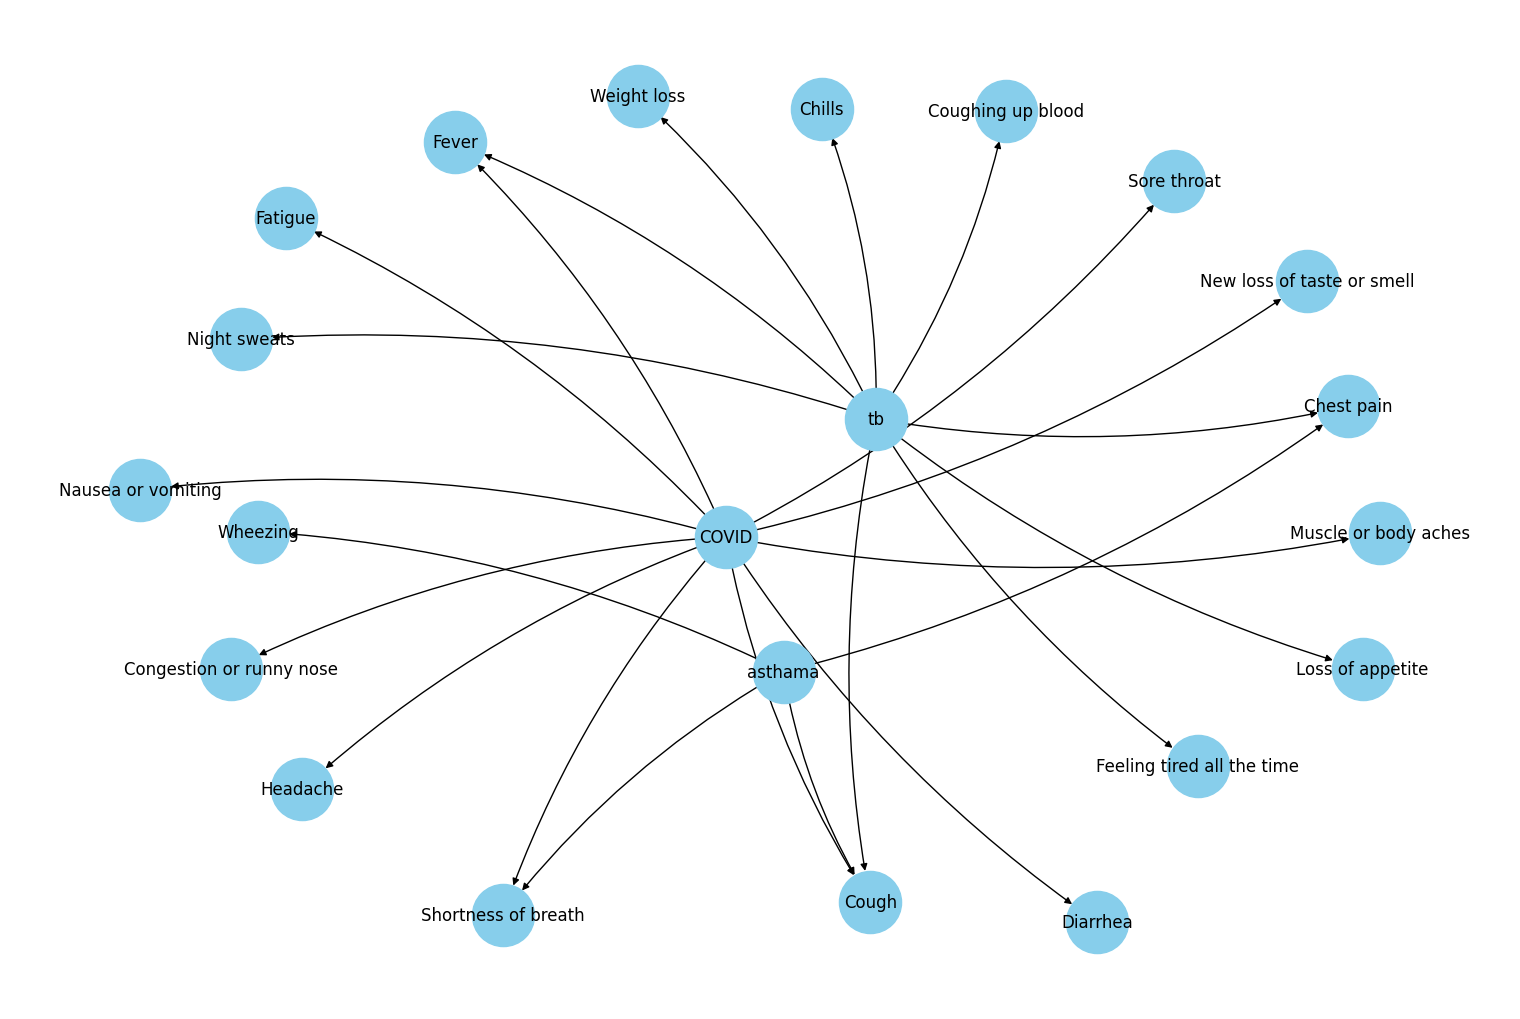

In [8]:
plt.figure(figsize=(15,10))
## create full graph
dtf = pd.read_csv('data-small.csv')
G = nx.from_pandas_edgelist(dtf, source="disease", target="symptoms", 
# G = nx.from_pandas_edgelist(dtf, source="symptoms", target="disease", 
                            # edge_attr="relation", 
                            create_using=nx.DiGraph())
pos = nx.spring_layout(G, k=1)
node_color = "skyblue"
edge_color = "black"

nx.draw(G, pos=pos, with_labels=True, node_color=node_color, 
        edge_color=edge_color, cmap=plt.cm.Dark2, 
        node_size=2000, connectionstyle='arc3,rad=0.1')

nx.draw_networkx_edge_labels(G, pos=pos, label_pos=0.5, 
                         edge_labels=nx.get_edge_attributes(G,'relation'),
                         font_size=12, font_color='black', alpha=0.6)
plt.show()

---

In [8]:
import pandas as pd
import re

ICD9_DIS = pd.read_csv("data/icd9-disease.csv", dtype={'code': 'str'})
ICD9_DIS['code'] = ICD9_DIS['code'].str.replace('.', '')
# ICD9_DIS.loc[ICD9_DIS['code'].str.contains("^409*"), ' disease'].tolist()[0]
ICD9_DIS.loc[ICD9_DIS['code'].str.contains(f"^4019.*"), ' disease'].tolist()[0]
# ICD9_DIS = pd.read_csv("data/data.csv",dtype={'code': 'str'} )
# # code_disease_map = code_disease_map.to_dict('dict')
# # code_disease_map.to_dict('dict')
# ICD9_DIS['code_1'] = ICD9_DIS['code'].str.replace('.', '')
# ICD9_DIS.loc[ICD9_DIS['code']]


' Unspecified essential hypertension'

In [1]:
from module import *


shap_val, codes, prob, diseases = disease_shap_exp("Patient with sever fever")

codes, diseases

/Users/k2/SCU/DataViz/Project/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/k2/SCU/DataViz/Project/.venv/lib/python3.9/site-packages/shap/utils/_clustering.py:35: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def _pt_shuffle_rec(i, indexes, index_mask, partition_tree, M, pos):
/Users/k2/SCU/DataViz/Project/.venv/lib/python3.9/site-packages/shap/utils/_clustering.py:54: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The im

(['038', '112', '276', '2761', '285', '401', '4019', '518', '995', '9959'],
 [' Streptococcal septicemia',
  ' Candidiasis of mouth',
  ' Hyperosmolality and/or hypernatremia',
  ' Hyposmolality and/or hyponatremia',
  ' Sideroblastic anemia',
  ' Malignant essential hypertension',
  ' Unspecified essential hypertension',
  ' Pulmonary collapse',
  ' Other anaphylactic reaction',
  'Systemic inflammatory response syndrome_ unspecified'])

In [7]:
# predicted_class, predicted_prob = predicted_labels[0] # 0th class
# shap.plots.text(shap_values[:, :, predicted_class])
# shap_val[:, :, ['276', '401', '995']]#[:, :, 0]
shap_val[:, :, '276']
# shap.plots.text(shap_val[:, :, ['276', '401']], color_bar=False)

.values =
array([[ 0.        ,  0.0788848 ,  0.4419198 , -0.14782011,  0.33947472,
        -0.16656432,  0.        ]])

.base_values =
array([0.44520006])

.data =
(array(['', 'Patient ', 'with ', 'se', 'ver ', 'fever', ''], dtype='<U8'),)

In [23]:
len(shap_values.data[0]), len(shap_values.values[0])

(10, 10)

In [41]:
import pandas as pd
MAX_DRUGS_PER_DIS = 10
df = pd.read_csv('data/ICDdrug/MEDI_wPrevalence_Published.csv', dtype='str')

codes = ["001", "414", "553"]
temp_df = df.loc[df['ICD9'].isin(codes), :]  # ['ICD9'].unique()
# --- nodes ---
# diseases
tdf1 = temp_df.groupby(["ICD9", "ICD9_STR"], as_index=False).first()
tdf1["node_type"] = "Disease"
node = tdf1.loc[:, ["ICD9", "ICD9_STR", "node_type"]].rename(
columns={"ICD9": "id", "ICD9_STR": "label"}).to_dict("records")
    # drugs
tdf1=temp_df.groupby("ICD9").head(10)
tdf1 = tdf1.groupby(['RXCUI_IN', 'DRUG_DESC'], as_index=False).first()
tdf1['node_type'] = 'Drug'
node.extend(tdf1.loc[:, ["RXCUI_IN", "DRUG_DESC", "node_type"]].rename(
    columns={"RXCUI_IN": "id", "DRUG_DESC": "label"}).to_dict("records"))
links = []
for code in codes:
    code_df = temp_df.loc[temp_df['ICD9']==code, :]
    if len(code_df['RXCUI_IN'].unique()) > MAX_DRUGS_PER_DIS:
        code_df = temp_df.loc[temp_df['ICD9']==code, :].head(MAX_DRUGS_PER_DIS)
    links.extend(code_df.loc[:, ['ICD9', 'RXCUI_IN']].rename(
    columns={'RXCUI_IN': 'to', 'ICD9': 'from'}).to_dict('records'))
node,links

([{'id': '001', 'label': 'Cholera', 'node_type': 'Disease'},
  {'id': '414',
   'label': 'Other forms of chronic ischemic heart disease',
   'node_type': 'Disease'},
  {'id': '553',
   'label': 'Other hernia of abdominal cavity without mention of obstruction or gangrene',
   'node_type': 'Disease'},
  {'id': '1151', 'label': 'Ascorbic Acid', 'node_type': 'Drug'},
  {'id': '1202', 'label': 'Atenolol', 'node_type': 'Drug'},
  {'id': '149', 'label': 'Acebutolol', 'node_type': 'Drug'},
  {'id': '19484', 'label': 'Bisoprolol', 'node_type': 'Drug'},
  {'id': '2348', 'label': 'Chloramphenicol', 'node_type': 'Drug'},
  {'id': '265647', 'label': 'Garlic preparation', 'node_type': 'Drug'},
  {'id': '2915', 'label': 'Creosote', 'node_type': 'Drug'},
  {'id': '3154', 'label': 'Demeclocycline', 'node_type': 'Drug'},
  {'id': '35829', 'label': 'ranolazine', 'node_type': 'Drug'},
  {'id': '3640', 'label': 'Doxycycline', 'node_type': 'Drug'},
  {'id': '4177', 'label': 'Etomidate', 'node_type': 'Drug'}

In [42]:
df = pd.read_csv(
        'data/ICDdrug/MEDI_wPrevalence_Published.csv', dtype='str')
codes = ["001", "414", "553"]
temp_df = df.loc[df['ICD9'].isin(codes), :]  # ['ICD9'].unique()
tdf1 = temp_df.groupby(['ICD9', 'ICD9_STR'], as_index=False).first()
tdf1['node_type'] = 'Disease'
node = tdf1.loc[:, ["ICD9", "ICD9_STR", "node_type"]].rename(
    columns={"ICD9": "id", "ICD9_STR": "label"}).to_dict("records")